<a href="https://colab.research.google.com/github/VicenteJFonseca/Machine-Learning-Absente-mo-Classificador/blob/main/classificador_absenteismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas e base de dados

In [85]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from numpy import loadtxt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
X_abs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/X_train.csv", delimiter = ";")
y_abs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/y_train.csv",  delimiter = ";")

## Visualização da Base de Dados

In [88]:
X_abs

,DT_VAGA,FALTA_ANTERIOR,DIASEMANA,TURNO,ATENDIM,RESP,DS_AREA,DS_CONSULTAEXAME,DS_ATUACAO,SEXO,IDADE_ATD,ESCOLARIDADE,PROCED,ESTCIVIL,CD_HORA
0,22/05/2020,0,5_Sexta-Feira,Manhã,Presencial,NaN,Ambulatório,Clinica Medica,Equipe Coluna - Prioridades,F,50,Ensino Médio,Capital,Viúvo,10
1,26/03/2020,1,4_Quinta-Feira,Tarde,Presencial,NaN,Ambulatório,Clinica Medica,Equipe Coluna,F,51,Ensino Médio,Região Metropolitana,Casado,16
2,08/11/2021,0,1_Segunda-Feira,Manhã,Presencial,NaN,Ambulatório,Reabilitação Neurológica B,Equipe RN (B) - Pré-internação,F,61,Superior,Região Metropolitana,sem união estável,9
3,24/11/2021,0,3_Quarta-Feira,Manhã,Presencial,Confirmada,Ambulatório,Reabilitação Neurológica A,Equipe RN (A) - Pré-internação,F,86,iletrado,Capital,Viúvo,10
4,23/05/2022,1,1_Segunda-Feira,Tarde,Não presencial,Confirmada,Ambulatório,Orientação por Telefone,Equipe LM - Pré-exame,M,36,Ensino Médio,Capital,Solteiro,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,22/08/2018,0,3_Quarta-Feira,Tarde,Presencial,NaN,Reabilitação Infantil,Orientação,Equipe Reab. Infantil 1,F,33,iletrado,Região Metropolitana,Solteiro,13
796,01/10/2018,0,1_Segunda-Feira,Tarde,Presencial,NaN,Ambulatório,Lesão Medular,Equipe LM,M,32,Ensino Fundamental,Capital,Solteiro,17
797,14/10/2020,0,3_Quarta-Feira,Manhã,Presencial,NaN,Ambulatório,Clinica Medica,Equipe Coluna,F,58,Ensino Médio,Capital,Solteiro,10
798,17/09/2018,0,1_Segunda-Feira,Tarde,Presencial,NaN,Reabilitação Infantil,Orientação,Equipe Reab. Infantil 2,M,7,Fora de idade escolar,Interior,Solteiro,15


In [89]:
%pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from pandas_profiling import ProfileReport
profile = ProfileReport(X_abs)

In [91]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
X_abs.DS_CONSULTAEXAME.value_counts()

Clinica Medica                      139
Lesão Medular                       134
Pediatria                           132
Reabilitação Neurológica B          108
Reabilitação Neurológica A           95
Orientação                           66
Atendimento Individual               36
Orientação por Telefone              29
Reabilitação Neurológica             23
Avaliação Vesical                     7
Aula de Orientação                    6
Programa Intensivo                    6
Programa de Neurodesenvolvimento      5
Socialização                          5
Reavaliação pós-consulta              4
Atendimento Integrado                 4
Reeducação Vesical - Infantil         1
Name: DS_CONSULTAEXAME, dtype: int64

In [93]:
X_abs.DS_ATUACAO.value_counts()

Equipe Pediatria                                80
Equipe Coluna                                   78
Equipe Reab. Infantil 1                         42
Equipe RN (A)                                   42
Equipe Coluna - Teleatendimento                 40
Equipe RN (B)                                   39
Equipe LM                                       36
Equipe Reab. Infantil 2                         32
Equipe Reab. Infantil 3                         30
Equipe RN(B) - Prioridades                      30
Equipe RN (A) - Pré-internação                  29
Equipe LM - Pré-exame                           27
Equipe Reab. Infantil 4                         26
Equipe LM - Pré-internação                      21
Equipe LM - Prioridades                         21
Equipe LM - 2                                   19
Atend. Específico                               19
Equipe RN (A) - Prioridades                     19
Equipe RN - Pós-alta                            17
Equipe RN (B) - Pré-internação 

In [94]:
X_abs.DS_AREA.value_counts()

Ambulatório              665
Reabilitação Infantil    135
Name: DS_AREA, dtype: int64

In [95]:
X_abs["DIASEMANA"].value_counts()

1_Segunda-Feira    179
3_Quarta-Feira     179
5_Sexta-Feira      164
2_Terça-Feira      155
4_Quinta-Feira     121
6_Sábado             2
Name: DIASEMANA, dtype: int64

## Pré-processamento dos dados

### Tratando Variável 'DIASEMANA'

O objetivo principal nesta variável é a separação em duas colunas: 'DIA_DA_SEMANA' e 'SEMANA'. A primeira tem o número correspondente ao dia da semana. Já a segunda contem o dia da semana na forma de string. Com isso, descartou-se a variável 'SEMANA' e mantivemos a variável 'DIA_DA_SEMANA' que já está na forma numérica e não necessitará outro pré-processamento.

In [96]:
X_abs[['DIA_DA_SEMANA','SEMANA']] = X_abs['DIASEMANA'].str.split("_", expand = True)

### Tratando variável 'DT_VAGA'

Como no tratamento anterior. Separou a variável cujo dado é uma data em três:'DIA_VAGA','MES_VAGA','ANO_VAGA'. O objetivo é ficar com a variável 'MES_VAGA' que retrata o mês de determinada instância.

In [97]:
X_abs[['DIA_VAGA','MES_VAGA','ANO_VAGA']] = X_abs['DT_VAGA'].str.split("/", expand = True)

### Tratando variável 'ESTCIVIL'

Para reduzir o número de categorias, foram criadas duas categorias novas que agregassem informações similares. As novas categorias são 'Solteiro' e 'União Estável'. Assim, das 6 categorias principais, por meio do tratamento resultaram em três.

In [98]:
X_abs.ESTCIVIL.value_counts()

Solteiro             482
Casado               235
sem união estável     44
Viúvo                 28
Sem informação         8
União Estável          3
Name: ESTCIVIL, dtype: int64

In [99]:
X_abs.loc[X_abs['ESTCIVIL'].isin(['Solteiro',
                                              'sem união estável',
                                              'Viúvo',]), 'ESTCIVIL'] = 'Solteiro'

In [100]:
X_abs.loc[X_abs['ESTCIVIL'].isin(['Casado','União Estável']), 'ESTCIVIL'] = 'União Estável'

In [101]:
X_abs['ESTCIVIL'].value_counts()

Solteiro          554
União Estável     238
Sem informação      8
Name: ESTCIVIL, dtype: int64

### Tratando variável 'DS_ATUACAO'

Mesmo processo adotado na variável anterior no qual foram agregados categorias similares originais em novas para que se reduzissem o número de categorias. Dessa forma, as 39 categorias originais resultaram 6.

In [102]:
len(X_abs.DS_ATUACAO.value_counts())

39

In [103]:
X_abs.loc[X_abs['DS_ATUACAO'].isin(
    ['Equipe Reab. Infantil 1','Equipe Reab. Infantil 2','Equipe Reab. Infantil 3',
    'Equipe Reab. Infantil 4','Equipe Reabilitação Infantil']),
    'DS_ATUACAO'] = 'Reabilitação Infantil'

In [104]:
X_abs.loc[X_abs['DS_ATUACAO'].isin(
    ['Equipe Pediatria','Equipe Pediatria - Pré-exame-Teleatendimento',
    'Equipe Pediatria - RVI','Equipe Pediatria - Pré-exame','Equipe Pediatria - Prioridades']),
    'DS_ATUACAO'] = 'Pediatria'

In [105]:
X_abs.loc[X_abs['DS_ATUACAO'].isin(
    ['Equipe Coluna','Equipe Coluna - Teleatendimento','Equipe Coluna - Prioridades']),
    'DS_ATUACAO'] = 'Coluna'

In [106]:
X_abs.loc[X_abs['DS_ATUACAO'].isin(
    ['Equipe RN (A)','Equipe RN (B)','Equipe RN(B) - Prioridades','Equipe RN (A) - Pré-internação',
    'Equipe RN (A) - Prioridades','Equipe RN - Pós-alta','Equipe RN (B) - Pré-internação','Equipe RN - RVI',
    'Equipe RN (A) - Pós-alta','Equipe RN (B) - Pós-alta','Equipe RN (A) - RVI']),
    'DS_ATUACAO'] = 'Reabilitação Neurológica'

In [107]:
X_abs.loc[X_abs['DS_ATUACAO'].isin(
    ['Equipe LM','Equipe LM - Pré-exame','Equipe LM - Pré-internação','Equipe LM - Prioridades',
    'Equipe LM - 2','Equipe LM - 1','Equipe LM - Teleatendimento','Equipe LM - Pós-alta']),
    'DS_ATUACAO'] = 'Lesão Medular'

In [108]:
X_abs.loc[X_abs['DS_ATUACAO'].isin(
    ['Equipe Interdisciplinar','Equipe Interprogramas - Pré-internação','Atend. Integrado - PP',
    'Dra. Luciana','Dra. Luciana - Prioridades','Atend. Integrado - TF','Atend. Específico']),
    'DS_ATUACAO'] = 'Outros'

In [109]:
len(X_abs['DS_ATUACAO'].value_counts())

6

### Tratamento da variável 'DS_CONSULTAEXAME'.

Foi adotado o mesmo tratamento de agregação de categorias similiares. Com isso, as 17 categorias originais originaram 8.

In [110]:
len(X_abs.DS_CONSULTAEXAME.value_counts())

17

In [111]:
X_abs.loc[X_abs['DS_CONSULTAEXAME'].isin(
    ['Reabilitação Neurológica B','Reabilitação Neurológica A','Reabilitação Neurológica']),
    'DS_CONSULTAEXAME'] = 'Reabilitação Neurológica'

In [112]:
X_abs.loc[X_abs['DS_CONSULTAEXAME'].isin(
    ['Orientação','Orientação por Telefone','Aula de Orientação']),
    'DS_CONSULTAEXAME'] = 'Orientação'

In [113]:
X_abs.loc[X_abs['DS_CONSULTAEXAME'].isin(
    ['Atendimento Individual','Atendimento Integrado']),
    'DS_CONSULTAEXAME'] = 'Atendimento'

In [114]:
X_abs.loc[X_abs['DS_CONSULTAEXAME'].isin(
    ['Avaliação Vesical','Programa Intensivo','Programa de Neurodesenvolvimento','Socialização',
    'Reavaliação pós-consulta','Reeducação Vesical - Infantil']),
    'DS_CONSULTAEXAME'] = 'Outros'

In [115]:
X_abs.loc[X_abs['DS_CONSULTAEXAME'].isin(['Avaliação Vesical','Outros']),'DS_CONSULTAEXAME']='Outros'

In [116]:
X_abs['DS_CONSULTAEXAME'] = X_abs['DS_CONSULTAEXAME'].replace(["Outros","Avaliação Vesical"], "Outros")

In [117]:
len(X_abs.DS_CONSULTAEXAME.value_counts())

8

### Ordinal Enconding sobre a variável 'ESCOLARIDADE'.

Nesta etapa do pré-processamento dos dados, adotou-se a técnica  Ordinal Enconder na variável 'ESCOLARIDADE' que expressa o nível de estudos do paciente de modo que, ao transformar as categorias em números, fossem preservados a relação de escalabilidade presente nos dados.

In [118]:
X_abs['ESCOLARIDADE'].value_counts()

Ensino Fundamental       258
Ensino Médio             201
Fora de idade escolar    190
Superior                  93
iletrado                  57
Outros                     1
Name: ESCOLARIDADE, dtype: int64

In [119]:
X_abs['ESCOLARIDADE'].unique()

array(['Ensino Médio', 'Superior', 'iletrado', 'Ensino Fundamental',
       'Fora de idade escolar', 'Outros'], dtype=object)

In [120]:
nivel_escolaridade = ['Superior','Ensino Médio','Ensino Fundamental','iletrado','Fora de idade escolar','Outros']

In [121]:
outros = X_abs.loc[X_abs['ESCOLARIDADE'] == 'Outros']
print(outros)

       DT_VAGA  FALTA_ANTERIOR      DIASEMANA  TURNO     ATENDIM RESP  \
22  24/04/2020               0  5_Sexta-Feira  Tarde  Presencial  NaN   

        DS_AREA DS_CONSULTAEXAME DS_ATUACAO SEXO  IDADE_ATD ESCOLARIDADE  \
22  Ambulatório       Orientação  Pediatria    F         15       Outros   

                  PROCED  ESTCIVIL  CD_HORA DIA_DA_SEMANA       SEMANA  \
22  Região Metropolitana  Solteiro       13             5  Sexta-Feira   

   DIA_VAGA MES_VAGA ANO_VAGA  
22       24       04     2020  


In [122]:
 ordem = OrdinalEncoder(categories = [nivel_escolaridade])

In [123]:
X_abs[['ESCOLARIDADE']] = ordem.fit_transform(X_abs[['ESCOLARIDADE']])

In [124]:
X_abs

,DT_VAGA,FALTA_ANTERIOR,DIASEMANA,TURNO,ATENDIM,RESP,DS_AREA,DS_CONSULTAEXAME,DS_ATUACAO,SEXO,IDADE_ATD,ESCOLARIDADE,PROCED,ESTCIVIL,CD_HORA,DIA_DA_SEMANA,SEMANA,DIA_VAGA,MES_VAGA,ANO_VAGA
0,22/05/2020,0,5_Sexta-Feira,Manhã,Presencial,NaN,Ambulatório,Clinica Medica,Coluna,F,50,1.0,Capital,Solteiro,10,5,Sexta-Feira,22,05,2020
1,26/03/2020,1,4_Quinta-Feira,Tarde,Presencial,NaN,Ambulatório,Clinica Medica,Coluna,F,51,1.0,Região Metropolitana,União Estável,16,4,Quinta-Feira,26,03,2020
2,08/11/2021,0,1_Segunda-Feira,Manhã,Presencial,NaN,Ambulatório,Reabilitação Neurológica,Reabilitação Neurológica,F,61,0.0,Região Metropolitana,Solteiro,9,1,Segunda-Feira,08,11,2021
3,24/11/2021,0,3_Quarta-Feira,Manhã,Presencial,Confirmada,Ambulatório,Reabilitação Neurológica,Reabilitação Neurológica,F,86,3.0,Capital,Solteiro,10,3,Quarta-Feira,24,11,2021
4,23/05/2022,1,1_Segunda-Feira,Tarde,Não presencial,Confirmada,Ambulatório,Orientação,Lesão Medular,M,36,1.0,Capital,Solteiro,15,1,Segunda-Feira,23,05,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,22/08/2018,0,3_Quarta-Feira,Tarde,Presencial,NaN,Reabilitação Infantil,Orientação,Reabilitação Infantil,F,33,3.0,Região Metropolitana,Solteiro,13,3,Quarta-Feira,22,08,2018
796,01/10/2018,0,1_Segunda-Feira,Tarde,Presencial,NaN,Ambulatório,Lesão Medular,Lesão Medular,M,32,2.0,Capital,Solteiro,17,1,Segunda-Feira,01,10,2018
797,14/10/2020,0,3_Quarta-Feira,Manhã,Presencial,NaN,Ambulatório,Clinica Medica,Coluna,F,58,1.0,Capital,Solteiro,10,3,Quarta-Feira,14,10,2020
798,17/09/2018,0,1_Segunda-Feira,Tarde,Presencial,NaN,Reabilitação Infantil,Orientação,Reabilitação Infantil,M,7,4.0,Interior,Solteiro,15,1,Segunda-Feira,17,09,2018


### Seleção de Variáveis

Retirou-se da matriz de características as variáveis resultantes das transformações nas etapas anteriores e que não são significativas para o modelo, tais como: ANO_VAGA, DIA_VAGA, SEMANA, DIASEMANA e DT_VAGA. A variável RESP, por sua vez, foi retirada uma vez que é composta sobretudo por dados faltantes como é possível verificar na etapa da análise exploratória aplicada anteriormente neste pipeline. Por fim, retirou-se TURNO e DS_AREA devido à alta correlação verificada dessas variáveis junto à variável DS_ATUACAO que foi mantida no modelo. Verificamos essa informação na etapa de visualização e exploração dos dados.

In [125]:
X_abs2 = X_abs.drop(['ANO_VAGA','DIA_VAGA','SEMANA','DIASEMANA','DT_VAGA','RESP','TURNO','DS_AREA'],axis = 1)

### Transformação da variável 'MES_VAGA' e 'DIA_DA_SEMANA'.

Com o objetivo de alcançar uma melhor performance do modelo de aprendizado de máquinas, nesta etapa foi aplicada a transformação numérica das variáveis categórias MES_VAGA e DIA_DA_SEMANA.

In [126]:
X_abs2['MES_VAGA'] = pd.to_numeric(X_abs2['MES_VAGA'])

In [127]:
X_abs2['DIA_DA_SEMANA'] = pd.to_numeric(X_abs2['DIA_DA_SEMANA'])

### Transforamação de variáveis: GET DUMMIES

Aplicou_se o método get_dummies do pacote Pandas para transformar as variáveis categóricas ATEDIM, DS_CONSULTAEXAME, DS_ATUACAO, SEXO, PROCED e ESTCIVIL em variáveis binárias para propiciar um melhor desempenho do modelo de aprendizado de máquinas.

In [128]:
X_abs3 = pd.get_dummies (data = X_abs2, columns = ['ATENDIM','DS_CONSULTAEXAME','DS_ATUACAO','SEXO','PROCED','ESTCIVIL'] )
X_abs3

,FALTA_ANTERIOR,IDADE_ATD,ESCOLARIDADE,CD_HORA,DIA_DA_SEMANA,MES_VAGA,ATENDIM_Não presencial,ATENDIM_Presencial,DS_CONSULTAEXAME_Atendimento,DS_CONSULTAEXAME_Avaliação Vesical,...,DS_ATUACAO_Reabilitação Neurológica,SEXO_F,SEXO_M,PROCED_Capital,PROCED_Interior,PROCED_Outros estados,PROCED_Região Metropolitana,ESTCIVIL_Sem informação,ESTCIVIL_Solteiro,ESTCIVIL_União Estável
0,0,50,1.0,10,5,5,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,51,1.0,16,4,3,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,61,0.0,9,1,11,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
3,0,86,3.0,10,3,11,0,1,0,0,...,1,1,0,1,0,0,0,0,1,0
4,1,36,1.0,15,1,5,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,33,3.0,13,3,8,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
796,0,32,2.0,17,1,10,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
797,0,58,1.0,10,3,10,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
798,0,7,4.0,15,1,9,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [129]:
X_abs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FALTA_ANTERIOR                             800 non-null    int64  
 1   IDADE_ATD                                  800 non-null    int64  
 2   ESCOLARIDADE                               800 non-null    float64
 3   CD_HORA                                    800 non-null    int64  
 4   DIA_DA_SEMANA                              800 non-null    int64  
 5   MES_VAGA                                   800 non-null    int64  
 6   ATENDIM_Não presencial                     800 non-null    uint8  
 7   ATENDIM_Presencial                         800 non-null    uint8  
 8   DS_CONSULTAEXAME_Atendimento               800 non-null    uint8  
 9   DS_CONSULTAEXAME_Avaliação Vesical         800 non-null    uint8  
 10  DS_CONSULTAEXAME_Clinica M

### Transformação de variáveis: MinMaxScaler

Foi aplicado a normalização das variáveis IDADE_ATD, ESCOLARIDADE e CD_HORA para evitar discrepâncias nas escalas entre as características. A opção pela normalização (MinMaxScaler) em detrimento da padronização (StandScaler) é porque no primeiro é possível obter a transformação dos dados entre a escala entre em zero e um; e ficando, dessa forma, em consonância com as variáveis dummies criadas na etapa anterior.

In [130]:
var_cont = ["IDADE_ATD","ESCOLARIDADE","CD_HORA"]
scaler = MinMaxScaler()
X_abs3[var_cont] = scaler.fit_transform(X_abs3[var_cont])
X_abs3[var_cont]

,IDADE_ATD,ESCOLARIDADE,CD_HORA
0,0.555556,0.2,0.250000
1,0.566667,0.2,0.750000
2,0.677778,0.0,0.166667
3,0.955556,0.6,0.250000
4,0.400000,0.2,0.666667
...,...,...,...
795,0.366667,0.6,0.500000
796,0.355556,0.4,0.833333
797,0.644444,0.2,0.250000
798,0.077778,0.8,0.666667


In [131]:
X_abs3

,FALTA_ANTERIOR,IDADE_ATD,ESCOLARIDADE,CD_HORA,DIA_DA_SEMANA,MES_VAGA,ATENDIM_Não presencial,ATENDIM_Presencial,DS_CONSULTAEXAME_Atendimento,DS_CONSULTAEXAME_Avaliação Vesical,...,DS_ATUACAO_Reabilitação Neurológica,SEXO_F,SEXO_M,PROCED_Capital,PROCED_Interior,PROCED_Outros estados,PROCED_Região Metropolitana,ESTCIVIL_Sem informação,ESTCIVIL_Solteiro,ESTCIVIL_União Estável
0,0,0.555556,0.2,0.250000,5,5,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0.566667,0.2,0.750000,4,3,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0.677778,0.0,0.166667,1,11,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
3,0,0.955556,0.6,0.250000,3,11,0,1,0,0,...,1,1,0,1,0,0,0,0,1,0
4,1,0.400000,0.2,0.666667,1,5,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0.366667,0.6,0.500000,3,8,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
796,0,0.355556,0.4,0.833333,1,10,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
797,0,0.644444,0.2,0.250000,3,10,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
798,0,0.077778,0.8,0.666667,1,9,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


## Conjuntos de Treino e Teste

Nesta etapa foi gerado os conjuntos de treino e teste. Cabe ressaltar a adoção do argumento stratify dado que o variável alvo (target) possui um destacado desbalanceamento entre as classes. Com isso, objetivou-se manter essa proporção ao treinar as métricas de avaliação do modelo.

In [132]:
X_treino, X_teste, y_treino, y_teste  = train_test_split(X_abs3, y_abs, test_size = 0.3, stratify = y_abs, random_state = 42)

X_treino2, X_validacao, y_treino2, y_validacao = train_test_split(X_treino, y_treino, stratify = y_treino)

In [133]:
y_treino.value_counts(normalize=True)

FALTA
0        0.85
1        0.15
dtype: float64

## Preparando Tracking

In [134]:
! pip install mlflow --quiet

In [135]:
import mlflow
from mlflow import MlflowClient

In [136]:
MLFLOW_TRACKING_URI='https://dagshub.com/vicentefonsecabh/absenteismo.mlflow'
MLFLOW_TRACKING_USERNAME='vicentefonsecabh'
MLFLOW_TRACKING_PASSWORD='3f7c8c0e42709cd06d456875e33cb92106bc1332'

In [137]:
os.environ['MLFLOW_TRACKING_USERNAME'] = MLFLOW_TRACKING_USERNAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = MLFLOW_TRACKING_PASSWORD

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [138]:
mlflow.sklearn.autolog(log_models=True, 
                       log_input_examples=True,
                       log_model_signatures=True)

In [139]:
tmp_dir = 'tmp'

if not os.path.exists(tmp_dir):
    os.makedirs(tmp_dir)

pickle.dump(scaler, 
            open(os.path.join(tmp_dir,
                              'scaler.pkl'), 'wb'))

In [140]:
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))

## Seleção de modelos 

Dado que a variável target possui desbalanceamento entre as classes, a acurácia não é a métrica ideal de avaliação do modelo. Assim, afim de captar esse desbalanceamento, a métrica adotada nos modelos aplicados abaixo foi o F1_score.

### Regressão Logística

Aplicou-se a regressão logística com e sem penalizações. Quanto a estes últimos,  também conhecidos como modelos lineares regularizados, foram adotados a Lasso (L1) e a Ridge(L2). O objetivo foi verificar se um modelo que penalizasse as 'features' não relevantes para a variabilidade da 'target' alcançaria uma melhor métrica F1. Não houveram diferenças entre os modelos

In [141]:
lr = LogisticRegression(solver='liblinear', random_state=42)

with mlflow.start_run(run_name ='LogisticRegression') as run:
  lr.fit(X_treino, y_treino)
  y_pred = lr.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2023/02/20 00:38:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

In [142]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       204
           1       0.00      0.00      0.00        36

    accuracy                           0.85       240
   macro avg       0.42      0.50      0.46       240
weighted avg       0.72      0.85      0.78       240



In [143]:
lr1 = LogisticRegression(penalty = 'l1', solver='liblinear', random_state=42)

with mlflow.start_run(run_name ='LogisticRegression') as run:
  lr1.fit(X_treino, y_treino)
  y_pred = lr1.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023/02/20 00:38:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best wa

In [144]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       204
           1       0.00      0.00      0.00        36

    accuracy                           0.85       240
   macro avg       0.42      0.50      0.46       240
weighted avg       0.72      0.85      0.78       240



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
lr2 = LogisticRegression(penalty = 'l2', solver='saga', random_state=42)

with mlflow.start_run(run_name ='LogisticRegression') as run:
  lr2.fit(X_treino, y_treino)
  y_pred = lr2.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
2023/02/20 00:38:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missi

In [146]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       204
           1       0.00      0.00      0.00        36

    accuracy                           0.85       240
   macro avg       0.42      0.50      0.46       240
weighted avg       0.72      0.85      0.78       240



### Máquina de Vetores de Suporte (SVM)

In [147]:
svm_clf = SVC(random_state = 42, C = 1, kernel = 'sigmoid')

with mlflow.start_run(run_name = 'SVM') as run:
  svm_clf.fit(X_treino, y_treino)
  y_pred = svm_clf.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2023/02/20 00:38:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

In [148]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       204
           1       0.12      0.06      0.08        36

    accuracy                           0.80       240
   macro avg       0.49      0.49      0.48       240
weighted avg       0.74      0.80      0.77       240



### Árvore de Decisão

In [149]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=42)
with mlflow.start_run(run_name = 'Decision_Tree') as run:
    tree_clf.fit(X_treino, y_treino)
    y_pred = tree_clf.predict(X_teste)
    accuracy = accuracy_score(y_teste, y_pred)
    f1_sc = f1_score(y_teste, y_pred, average = 'macro')
    recall = recall_score(y_teste, y_pred, average = 'macro')
    precision = precision_score(y_teste, y_pred, average ='macro')
    conf_matrix = confusion_matrix(y_teste, y_pred)
    mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))                               

2023/02/20 00:38:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [150]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       204
           1       0.22      0.06      0.09        36

    accuracy                           0.83       240
   macro avg       0.54      0.51      0.50       240
weighted avg       0.76      0.83      0.78       240



### KNN

O gráfico abaixo mostra qual a menor taxa de erro para o valor k expresso pelo argumento 'n_neighbors' do modelo KNN. Segundo resultado, o melhor valor ocorre a partir de 10 quando o erro médio se estabiliza.

In [151]:
knn = KNeighborsClassifier(n_neighbors=3)

with mlflow.start_run(run_name = 'K-Neighbors') as run:
  knn.fit(X_treino,y_treino)
  y_pred = knn.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
2023/02/20 00:38:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

In [152]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89       204
           1       0.24      0.11      0.15        36

    accuracy                           0.81       240
   macro avg       0.55      0.52      0.52       240
weighted avg       0.76      0.81      0.78       240



### Floresta Aleatória

O gráfico abaixo nos mostra o melhor valor para o argumento n_estimators no método Random Forest.

In [153]:
forest = RandomForestClassifier(n_estimators = 1, criterion='entropy', max_depth=6, random_state=42)

with mlflow.start_run(run_name = 'Forest_Random') as run:
  forest.fit(X_treino, y_treino)
  y_pred = forest.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

2023/02/20 00:38:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/utils/autologging_utils/safety.py:533: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()."
2023/02/20 00:38:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever the

In [154]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       204
           1       0.11      0.03      0.04        36

    accuracy                           0.82       240
   macro avg       0.48      0.49      0.47       240
weighted avg       0.74      0.82      0.77       240



### Vote Classifier

In [155]:
lr_clf = LogisticRegression()
svc_clf = SVC()
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

vot_clf = VotingClassifier(
    estimators=[('lr', lr_clf),('rf', forest_clf),('svc', svc_clf),('tr',tree_clf),('knn',knn_clf)],
    voting = 'hard')

with mlflow.start_run(run_name='K-Neighbors') as run:
  vot_clf.fit(X_treino, y_treino)
  y_pred = vot_clf.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [156]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       204
           1       0.50      0.03      0.05        36

    accuracy                           0.85       240
   macro avg       0.68      0.51      0.49       240
weighted avg       0.80      0.85      0.79       240




### Gradient Boosting Classifier


In [157]:
gbc = GradientBoostingClassifier(n_estimators = 400, learning_rate=0.01)

with mlflow.start_run(run_name ='Gradiente Boosting Classifier') as run:
  gbc.fit(X_treino, y_treino)
  y_pred = gbc.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))
  

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2023/02/20 00:39:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https:/

In [158]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       204
           1       0.00      0.00      0.00        36

    accuracy                           0.83       240
   macro avg       0.42      0.49      0.45       240
weighted avg       0.72      0.83      0.77       240



### Bagging

In [159]:
bag = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=800, max_samples=200, n_jobs=-1)

with mlflow.start_run(run_name = 'bagging') as run:
  bag.fit(X_treino, y_treino)
  y_pred = bag.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2023/02/20 00:39:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <ht

In [160]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       204
           1       0.00      0.00      0.00        36

    accuracy                           0.85       240
   macro avg       0.42      0.50      0.46       240
weighted avg       0.72      0.85      0.78       240



### AdaBoost

In [166]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

with mlflow.start_run(run_name = 'bagging') as run:
  ada.fit(X_treino, y_treino)
  y_pred = ada.predict(X_teste)
  accuracy = accuracy_score(y_teste, y_pred)
  f1_sc = f1_score(y_teste, y_pred, average = 'macro')
  recall = recall_score(y_teste, y_pred, average = 'macro')
  precision = precision_score(y_teste, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2023/02/20 00:56:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

In [167]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       204
           1       0.00      0.00      0.00        36

    accuracy                           0.83       240
   macro avg       0.42      0.49      0.45       240
weighted avg       0.72      0.83      0.77       240



## Redes Neurais

In [161]:
import mlflow.keras
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from __future__ import absolute_import, division, print_function, unicode_literals


try:
 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

mlflow.keras.autolog()
modelo = keras.models.Sequential([
    keras.layers.Dense(900, activation ='relu', input_shape = (31,), name = "Dense_1"),
    keras.layers.Dense(700, activation ='relu', name = "Dense_2"),
    keras.layers.Dense(500, activation ='relu', name = "Dense_3"),
    keras.layers.Dense(1, activation ='sigmoid',name = "Dense_4")
])


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [162]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 900)               28800     
                                                                 
 Dense_2 (Dense)             (None, 700)               630700    
                                                                 
 Dense_3 (Dense)             (None, 500)               350500    
                                                                 
 Dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 1,010,501
Trainable params: 1,010,501
Non-trainable params: 0
_________________________________________________________________


In [163]:
modelo.compile(loss='binary_crossentropy',
               optimizer ='adam',
               metrics=['accuracy',
               'Recall',
               'AUC',
               'TruePositives'])
history = modelo.fit(X_treino, 
                     y_treino,
                     epochs=50,
                     validation_data = (X_validacao, y_validacao))
with mlflow.start_run() as run:
    mlflow.keras.log_model(modelo, "RNA")

2023/02/20 00:39:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '76030b308e5247cfbc7782d74c6351e3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/50
18/18 [==============================] - 2s 54ms/step - loss: 0.4781 - accuracy: 0.8036 - recall: 0.0357 - auc: 0.5545 - true_positives: 3.0000 - val_loss: 0.3894 - val_accuracy: 0.8500 - val_recall: 0.0000e+00 - val_auc: 0.7445 - val_true_positives: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 24ms/step - loss: 0.4072 - accuracy: 0.8500 - recall: 0.0000e+00 - auc: 0.6499 - true_positives: 0.0000e+00 - val_loss: 0.3727 - val_accuracy: 0.8500 - val_recall: 0.0000e+00 - val_auc: 0.7669 - val_true_positives: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 24ms/step - loss: 0.3979 - accuracy: 0.8500 - recall: 0.0000e+00 - auc: 0.6713 - true_positives: 0.0000e+00 - val_loss: 0.3653 - val_accuracy: 0.8500 - val_recall: 0.0000e+00 - val_auc: 0.7723 - val_true_positives: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 1s 30ms/step - loss: 0.3862 - accuracy: 0.8500 - recall: 0.0000e+00 - auc: 0.7013 - true_positives: 0.0000e+00 - 

2023/02/20 00:40:20 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2023/02/20 00:40:20 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/02/20 00:40:28 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp_qlyt_7k/model, flavor: tensorflow), fall back to return ['tensorflow==2.11.0']. Set logging level to DEBUG to see the

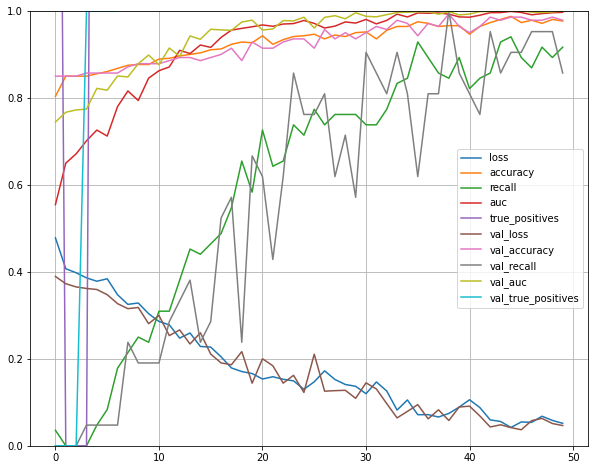

In [164]:
pd.DataFrame(history.history).plot(figsize = (10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [165]:
modelo.evaluate(X_teste, y_teste)

8/8 [==============================] - 0s 8ms/step - loss: 2.0962 - accuracy: 0.7833 - recall: 0.0833 - auc: 0.4855 - true_positives: 3.0000


[2.0962297916412354,
 0.7833333611488342,
 0.0833333358168602,
 0.4854983687400818,
 3.0]

## Oversampling: SMOTE

Dado que há um desbalanceamento entre os dados, os algoritmos não foram exitosos na previsão da classe menos numerosa. Dessa forma, aplicou-se o método oversampling no conjunto de dados para alcançar o balanceamento. Depois disso, aplicou-se novamente o modelo KNN que havia atingido  as melhores métricas antes da nova amostragem.

In [169]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_abs3, y_abs)

2023/02/20 01:25:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '028567f65594441398476e29bad2dd74', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/02/20 01:25:17 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/02/20 01:25:17 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/02/20 01:25:17 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [170]:
y_abs.value_counts(normalize=True)

FALTA
0        0.85
1        0.15
dtype: float64

In [172]:
y_smote.value_counts(normalize=True)

FALTA
0        0.5
1        0.5
dtype: float64

In [173]:
X_treino_ovs, X_teste_ovs, y_treino_ovs, y_teste_ovs  = train_test_split(X_smote,
                                                                         y_smote,
                                                                         test_size = 0.3, 
                                                                         random_state = 42)                                                     

In [175]:
knn = KNeighborsClassifier(n_neighbors=3)

with mlflow.start_run(run_name = 'K-Neighbors') as run:
  knn.fit(X_treino_ovs,y_treino_ovs)
  y_pred = knn.predict(X_teste_ovs)
  accuracy = accuracy_score(y_teste_ovs, y_pred)
  f1_sc = f1_score(y_teste_ovs, y_pred, average = 'macro')
  recall = recall_score(y_teste_ovs, y_pred, average = 'macro')
  precision = precision_score(y_teste_ovs, y_pred, average ='macro')
  conf_matrix = confusion_matrix(y_teste_ovs, y_pred)
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
2023/02/20 01:36:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.8/dist-packages/mlflow/models/signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

In [176]:
print(classification_report(y_teste_ovs, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       203
           1       0.77      0.94      0.85       205

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408

